<center>
<h1> Linear Regression End to End Case Study
</center>

### Steps for Regression Modeling:
1. Business problem definition - One of major automobile company would like to design new product which can improve the sales. Inorder to define the product, they want to understand/identify drivers for the sales (what are the factors driving sales) and Predicting sales of different car models given driving factors. 
2. Convert business problem into statistical problem  sales = F(sales attributes, product features, marketing info etc.)
3. Finding the right technique - Since it is predicting value (Regression Problem) problem so we can use OLS Linear Regression (Oridinary Least Squares )  as one of the technique. We can also use other techniques like Decision Trees, Ensemble learning, KNN, SVM, ANN etc.
4. Data collection(Y, X) - Identify the sources of information and collect the data
5. Import and Consolidate the data - aggregate and consolidate the data at Model level/customer level/store level depends on business problem
6. Data preparation for modeling (create data audit report to identify the steps to perform as part of data preparation)
    a. missing value treatment
    b. outlier treatment
    c. dummy variable creation
7. Variable creation by using transformation and derived variable creation.
8. Basic assumptions (Normality, linearity, no outliers, homoscadasticity, no pattern in residuals, no auto correlation etc)
9. Variable reduction techniques (removing multicollinerity with the help of FA/PCA, correlation matrics, VIF)
10. Create dev and validation data sets (50:50 if you have more data else 70:30 or 80:20)
11. Modeling on dev data set (identify significant variables, model interpretation, check the signs and coefficients, multi-collinierity check, measures of good neess fit, final mathematical equation etc)
12. validating on validation data set (check the stability of model, scoring, decile analysis, cross validation etc.)
13. Output interpretation and derive insights (understand the limitations of the model and define strategy to implementation)
14. convert statistical solution into business solutions (implementation, model monitoring etc)


In [197]:
# Import the necceasary packages

# Numerical Operations
import numpy as np
import pandas as pd  

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

#Date
import datetime as dt
# Auto EDA
#import pandas_profiling

#Data Prep 
from sklearn.model_selection import train_test_split

#Models
from statsmodels.api import OLS 


### Import Data 

In [198]:
data = pd.read_csv('Car_sales.csv').convert_dtypes()
data

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.28015
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,<NA>,3.2,225,106.9,70.6,192.0,3.47,17.2,26,1/4/2012,<NA>
3,Acura,RL,8.588,29.725,Passenger,42.0,3.5,210,114.6,71.4,196.6,3.85,18.0,22,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,<NA>,Passenger,24.4,1.9,160,100.5,67.6,176.6,3.042,15.8,25,9/21/2011,66.498812
153,Volvo,S70,15.245,<NA>,Passenger,27.5,2.4,168,104.9,69.3,185.9,3.208,17.9,25,11/24/2012,70.654495
154,Volvo,V70,17.531,<NA>,Passenger,28.8,2.4,168,104.9,69.3,186.2,3.259,17.9,25,6/25/2011,71.155978
155,Volvo,C70,3.493,<NA>,Passenger,45.5,2.3,236,104.9,71.5,185.7,3.601,18.5,23,4/26/2011,101.623357


## Data Audit

In [199]:
data.isna().sum()

Manufacturer               0
Model                      0
Sales_in_thousands         0
four_year_resale_value    36
Vehicle_type               0
Price_in_thousands         2
Engine_size                1
Horsepower                 1
Wheelbase                  1
Width                      1
Length                     1
Curb_weight                2
Fuel_capacity              1
Fuel_efficiency            3
Latest_Launch              0
Power_perf_factor          2
dtype: int64

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    string 
 1   Model                   157 non-null    string 
 2   Sales_in_thousands      157 non-null    Float64
 3   four_year_resale_value  121 non-null    Float64
 4   Vehicle_type            157 non-null    string 
 5   Price_in_thousands      155 non-null    Float64
 6   Engine_size             156 non-null    Float64
 7   Horsepower              156 non-null    Int64  
 8   Wheelbase               156 non-null    Float64
 9   Width                   156 non-null    Float64
 10  Length                  156 non-null    Float64
 11  Curb_weight             155 non-null    Float64
 12  Fuel_capacity           156 non-null    Float64
 13  Fuel_efficiency         154 non-null    Int64  
 14  Latest_Launch           157 non-null    st

In [201]:
data.shape

(157, 16)

In [202]:
data.isna().sum() / data.shape[0]

Manufacturer              0.000000
Model                     0.000000
Sales_in_thousands        0.000000
four_year_resale_value    0.229299
Vehicle_type              0.000000
Price_in_thousands        0.012739
Engine_size               0.006369
Horsepower                0.006369
Wheelbase                 0.006369
Width                     0.006369
Length                    0.006369
Curb_weight               0.012739
Fuel_capacity             0.006369
Fuel_efficiency           0.019108
Latest_Launch             0.000000
Power_perf_factor         0.012739
dtype: float64

In [203]:
# Dropping the column 

data = data.drop(columns=['four_year_resale_value','Model'])
data = data.dropna(axis='index',thresh=np.math.floor(data.shape[1] * 0.8 ))



In [204]:
# Date format

data.Latest_Launch =  pd.to_datetime(data.Latest_Launch,format='%m/%d/%Y')

In [205]:
features_col = data.columns.difference(['Sales_in_thousands'])
target_col = 'Sales_in_thousands'

In [206]:
features_col

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Latest_Launch', 'Length', 'Manufacturer',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type', 'Wheelbase',
       'Width'],
      dtype='object')

In [207]:
target_col

'Sales_in_thousands'

## EDA 

<AxesSubplot:>

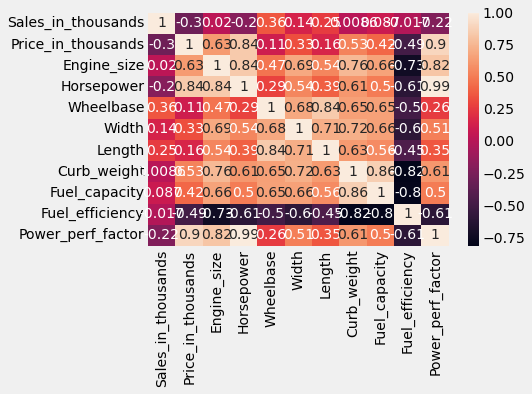

In [208]:
d = data.select_dtypes('number').corr()

sns.heatmap(d, annot=True)

In [209]:
#sns.pairplot(data.select_dtypes([float]))

<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

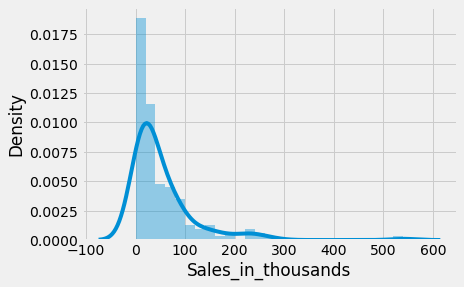

In [210]:
# Linear Regression on Normal data ( normally distributed data)
# 

sns.distplot(data[target_col])

<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

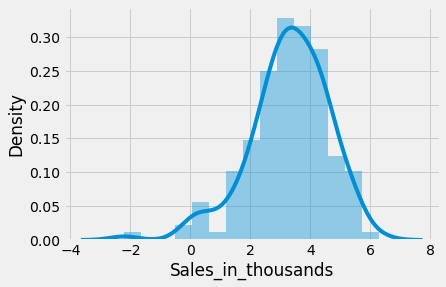

In [211]:
sns.distplot(np.log(data[target_col]))

In [212]:
from pandas_profiling import ProfileReport 

#rp = ProfileReport(data,explorative=True)

#rp.to_file('my_report.html')

In [213]:
#rp.to_widgets()

In [214]:
# Try DTale as well for AutoEDA

In [215]:
data.Fuel_efficiency.dropna().plot(kind='box',backend='plotly')

### Data Preparation 

 The objective of this stage is to prepare our data to feed it to the model

In [216]:
x_train,x_test ,y_train,y_test = train_test_split(data[features_col],data[target_col],test_size=0.2,random_state=12345)

copy_of_raw_xtrain = x_train.copy()
print(x_train.shape)
print(x_test.shape)


(124, 13)
(32, 13)


In [217]:
x_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 96 to 29
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Curb_weight         123 non-null    Float64       
 1   Engine_size         124 non-null    Float64       
 2   Fuel_capacity       124 non-null    Float64       
 3   Fuel_efficiency     122 non-null    Int64         
 4   Horsepower          124 non-null    Int64         
 5   Latest_Launch       124 non-null    datetime64[ns]
 6   Length              124 non-null    Float64       
 7   Manufacturer        124 non-null    string        
 8   Power_perf_factor   124 non-null    Float64       
 9   Price_in_thousands  124 non-null    Float64       
 10  Vehicle_type        124 non-null    string        
 11  Wheelbase           124 non-null    Float64       
 12  Width               124 non-null    Float64       
dtypes: Float64(8), Int64(2), datetime64[ns](1), string

In [218]:
x_train.select_dtypes(np.number).describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Power_perf_factor,Price_in_thousands,Wheelbase,Width
count,123.000000,124.000000,124.000000,122.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,3.396236,3.093548,18.087903,23.663934,185.612903,186.798387,77.056845,27.479355,107.238710,71.288710
std,0.656506,1.062498,4.025520,4.486178,55.365557,13.800736,24.607375,14.223204,7.463273,3.580735
min,1.895000,1.000000,10.300000,15.000000,55.000000,149.400000,23.276272,9.235000,92.600000,62.600000
10%,2.599600,1.930000,13.200000,18.000000,120.000000,171.390000,48.410215,14.077900,97.560000,66.900000
20%,2.919400,2.000000,15.200000,21.000000,140.000000,175.040000,57.566502,17.169400,100.980000,67.860000
30%,3.044200,2.400000,16.000000,21.300000,152.700000,178.180000,62.344016,19.355700,103.190000,68.900000
40%,3.191000,2.700000,16.920000,23.000000,170.000000,183.220000,69.824635,21.570000,105.920000,70.100000
50%,3.340000,3.000000,17.350000,24.000000,180.000000,186.450000,72.897067,23.099500,107.050000,70.750000
60%,3.489600,3.300000,18.500000,25.000000,194.800000,191.780000,80.628492,26.007000,108.460000,72.080000


In [219]:
x_train

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Latest_Launch,Length,Manufacturer,Power_perf_factor,Price_in_thousands,Vehicle_type,Wheelbase,Width
96,3.055,2.3,15.9,26,190,2011-01-16,157.9,Mercedes-B,82.807362,38.9,Passenger,94.5,67.5
142,2.668,2.0,15.3,27,127,2011-05-06,163.8,Toyota,51.955109,16.888,Car,94.9,66.7
66,3.65,3.0,18.4,21,240,2012-11-03,191.3,Jaguar,102.178985,42.8,Passenger,114.5,71.6
100,4.387,3.2,19.0,20,215,2011-02-10,180.6,Mercedes-B,90.495532,35.3,Car,111.0,72.2
123,3.942,3.4,25.0,23,185,2012-07-22,201.3,Pontiac,76.20844,25.635,Car,120.0,72.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2.567,2.0,12.5,29,132,2011-12-12,174.4,Dodge,52.084899,12.64,Passenger,105.0,74.4
102,3.012,2.4,15.9,25,155,2011-08-02,183.5,Nissan,63.313728,20.39,Passenger,103.1,69.1
127,3.28,2.3,18.5,23,170,2012-11-09,189.2,Saab,73.503778,33.12,Passenger,106.4,70.6
130,2.367,1.9,12.1,33,100,2011-03-16,180.0,Saturn,40.700072,12.535,Passenger,102.4,66.4


In [220]:
x_train['Days_since_launch'] = (dt.datetime.now() - x_train['Latest_Launch']).dt.days
x_train = x_train.drop(columns=['Latest_Launch'])

x_train

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Manufacturer,Power_perf_factor,Price_in_thousands,Vehicle_type,Wheelbase,Width,Days_since_launch
96,3.055,2.3,15.9,26,190,157.9,Mercedes-B,82.807362,38.9,Passenger,94.5,67.5,4348
142,2.668,2.0,15.3,27,127,163.8,Toyota,51.955109,16.888,Car,94.9,66.7,4238
66,3.65,3.0,18.4,21,240,191.3,Jaguar,102.178985,42.8,Passenger,114.5,71.6,3691
100,4.387,3.2,19.0,20,215,180.6,Mercedes-B,90.495532,35.3,Car,111.0,72.2,4323
123,3.942,3.4,25.0,23,185,201.3,Pontiac,76.20844,25.635,Car,120.0,72.7,3795
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2.567,2.0,12.5,29,132,174.4,Dodge,52.084899,12.64,Passenger,105.0,74.4,4018
102,3.012,2.4,15.9,25,155,183.5,Nissan,63.313728,20.39,Passenger,103.1,69.1,4150
127,3.28,2.3,18.5,23,170,189.2,Saab,73.503778,33.12,Passenger,106.4,70.6,3685
130,2.367,1.9,12.1,33,100,180.0,Saturn,40.700072,12.535,Passenger,102.4,66.4,4289


In [221]:
x_train.Manufacturer.value_counts()

Dodge         9
Ford          8
Toyota        8
Mercedes-B    7
Mitsubishi    7
Chevrolet     7
Nissan        6
Pontiac       6
Oldsmobile    5
Volvo         5
Volkswagen    5
Mercury       4
Chrysler      4
Plymouth      4
Hyundai       3
Jeep          3
Buick         3
BMW           3
Lexus         3
Honda         3
Porsche       3
Lincoln       3
Acura         3
Cadillac      3
Audi          2
Saab          2
Saturn        2
Subaru        1
Jaguar        1
Infiniti      1
Name: Manufacturer, dtype: Int64

In [222]:
# Assigning manafactuter with less variance / fewer examples to 'Others'

b = (x_train.Manufacturer.value_counts() > 5)
final_manf =  x_train.Manufacturer.value_counts().index[b]

x_train['Manufacturer'] = np.where(x_train['Manufacturer'].isin( final_manf),x_train.Manufacturer,'Others')

In [223]:
x_train

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Manufacturer,Power_perf_factor,Price_in_thousands,Vehicle_type,Wheelbase,Width,Days_since_launch
96,3.055,2.3,15.9,26,190,157.9,Mercedes-B,82.807362,38.9,Passenger,94.5,67.5,4348
142,2.668,2.0,15.3,27,127,163.8,Toyota,51.955109,16.888,Car,94.9,66.7,4238
66,3.65,3.0,18.4,21,240,191.3,Others,102.178985,42.8,Passenger,114.5,71.6,3691
100,4.387,3.2,19.0,20,215,180.6,Mercedes-B,90.495532,35.3,Car,111.0,72.2,4323
123,3.942,3.4,25.0,23,185,201.3,Pontiac,76.20844,25.635,Car,120.0,72.7,3795
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2.567,2.0,12.5,29,132,174.4,Dodge,52.084899,12.64,Passenger,105.0,74.4,4018
102,3.012,2.4,15.9,25,155,183.5,Nissan,63.313728,20.39,Passenger,103.1,69.1,4150
127,3.28,2.3,18.5,23,170,189.2,Others,73.503778,33.12,Passenger,106.4,70.6,3685
130,2.367,1.9,12.1,33,100,180.0,Others,40.700072,12.535,Passenger,102.4,66.4,4289


In [224]:
#Outlier treatment

for i in x_train.select_dtypes(np.number):
    lower_bound = x_train[i].quantile(0.01)
    upper_bound = x_train[i].quantile(0.99)
    x_train[i] = np.clip(x_train[i],lower_bound,upper_bound)

In [225]:
x_train.select_dtypes(np.number).describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Length,Power_perf_factor,Price_in_thousands,Wheelbase,Width,Days_since_launch
count,123.000000,124.000000,124.000000,122.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,3.397658,3.079032,18.093758,23.565574,186.755000,76.781198,27.391315,107.126677,71.309613,4028.442903
std,0.646084,0.981807,3.976642,4.132091,13.494971,22.902944,13.836830,7.071235,3.510229,235.334980
min,2.242200,1.569000,11.923000,15.000000,153.219000,37.598675,10.182000,92.715000,65.861000,3641.460000
10%,2.599600,1.930000,13.200000,18.000000,171.390000,48.410215,14.077900,97.560000,66.900000,3720.000000
20%,2.919400,2.000000,15.200000,21.000000,175.040000,57.566502,17.169400,100.980000,67.860000,3819.200000
30%,3.044200,2.400000,16.000000,21.300000,178.180000,62.344016,19.355700,103.190000,68.900000,3890.400000
40%,3.191000,2.700000,16.920000,23.000000,183.220000,69.824635,21.570000,105.920000,70.100000,3945.800000
50%,3.340000,3.000000,17.350000,24.000000,186.450000,72.897067,23.099500,107.050000,70.750000,4019.000000
60%,3.489600,3.300000,18.500000,25.000000,191.780000,80.628492,26.007000,108.460000,72.080000,4099.200000


In [226]:
# Univariate Missing imputation
# for numeric columns we can impute it with either the mean or the median 
# for categoricals we can impute it with the mode 

x_train

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Manufacturer,Power_perf_factor,Price_in_thousands,Vehicle_type,Wheelbase,Width,Days_since_launch
96,3.055,2.3,15.9,26,190,157.9,Mercedes-B,82.807362,38.9,Passenger,94.5,67.5,4348.0
142,2.668,2.0,15.3,27,127,163.8,Toyota,51.955109,16.888,Car,94.9,66.7,4238.0
66,3.65,3.0,18.4,21,240,191.3,Others,102.178985,42.8,Passenger,114.5,71.6,3691.0
100,4.387,3.2,19.0,20,215,180.6,Mercedes-B,90.495532,35.3,Car,111.0,72.2,4323.0
123,3.942,3.4,25.0,23,185,201.3,Pontiac,76.20844,25.635,Car,120.0,72.7,3795.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2.567,2.0,12.5,29,132,174.4,Dodge,52.084899,12.64,Passenger,105.0,74.4,4018.0
102,3.012,2.4,15.9,25,155,183.5,Nissan,63.313728,20.39,Passenger,103.1,69.1,4150.0
127,3.28,2.3,18.5,23,170,189.2,Others,73.503778,33.12,Passenger,106.4,70.6,3685.0
130,2.367,1.9,12.1,33,100,180.0,Others,40.700072,12.535,Passenger,102.4,66.4,4289.0


In [227]:
x_train.loc[x_train.isna().sum(axis=1)>0]

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Manufacturer,Power_perf_factor,Price_in_thousands,Vehicle_type,Wheelbase,Width,Days_since_launch
38,3.489,2.7,17.0,<NA>,202,203.7,Dodge,80.83147,22.505,Passenger,113.0,74.7,3845.0
109,3.455,3.5,18.0,<NA>,215,195.9,Others,86.272523,24.15,Passenger,109.0,73.6,4273.0
15,<NA>,4.6,18.5,22,275,201.0,Others,115.621358,44.475,Passenger,112.2,75.0,4245.0


In [228]:
x_train.Fuel_efficiency

96     26
142    27
66     21
100    20
123    23
       ..
35     29
102    25
127    23
130    33
29     24
Name: Fuel_efficiency, Length: 124, dtype: Int64

In [229]:
d =  x_train.fillna({'Fuel_efficiency':x_train.Fuel_efficiency.mean()//1,'Curb_weight': 3.8})

In [230]:
d.loc[x_train.isna().sum(axis=1)>0]

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Manufacturer,Power_perf_factor,Price_in_thousands,Vehicle_type,Wheelbase,Width,Days_since_launch
38,3.489,2.7,17.0,23,202,203.7,Dodge,80.83147,22.505,Passenger,113.0,74.7,3845.0
109,3.455,3.5,18.0,23,215,195.9,Others,86.272523,24.15,Passenger,109.0,73.6,4273.0
15,3.8,4.6,18.5,22,275,201.0,Others,115.621358,44.475,Passenger,112.2,75.0,4245.0


In [231]:
x_train.Fuel_efficiency.mean() // 1 

23.0

In [232]:
# Missing Value treatment
missing_imputer={}
for i in x_train:
    if pd.api.types.is_number(x_train[i]):
        missing_imputer[i] = x_train[i].median()
    else:
        missing_imputer[i] = x_train[i].mode()[0]
        

missing_imputer

{'Curb_weight': 2.2422,
 'Engine_size': 2.0,
 'Fuel_capacity': 18.5,
 'Fuel_efficiency': 25,
 'Horsepower': 150,
 'Length': 186.3,
 'Manufacturer': 'Others',
 'Power_perf_factor': 37.5986750132,
 'Price_in_thousands': 10.182,
 'Vehicle_type': 'Passenger',
 'Wheelbase': 112.2,
 'Width': 66.7,
 'Days_since_launch': 4801.0}

In [233]:
x_train = x_train.fillna(missing_imputer)

In [234]:
# Dealing with categoricals

x_train = pd.get_dummies(x_train,columns=['Manufacturer','Vehicle_type']).drop(columns=['Manufacturer_Others','Vehicle_type_Passenger'])

In [235]:
x_train

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Power_perf_factor,Price_in_thousands,Wheelbase,Width,Days_since_launch,Manufacturer_Chevrolet,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Mercedes-B,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Pontiac,Manufacturer_Toyota,Vehicle_type_Car
96,3.055,2.3,15.9,26,190.0,157.9,82.807362,38.9,94.5,67.5,4348.0,0,0,0,1,0,0,0,0,0
142,2.668,2.0,15.3,27,127.0,163.8,51.955109,16.888,94.9,66.7,4238.0,0,0,0,0,0,0,0,1,1
66,3.65,3.0,18.4,21,240.0,191.3,102.178985,42.8,114.5,71.6,3691.0,0,0,0,0,0,0,0,0,0
100,4.387,3.2,19.0,20,215.0,180.6,90.495532,35.3,111.0,72.2,4323.0,0,0,0,1,0,0,0,0,1
123,3.942,3.4,25.0,23,185.0,201.3,76.20844,25.635,120.0,72.7,3795.0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2.567,2.0,12.5,29,132.0,174.4,52.084899,12.64,105.0,74.4,4018.0,0,1,0,0,0,0,0,0,0
102,3.012,2.4,15.9,25,155.0,183.5,63.313728,20.39,103.1,69.1,4150.0,0,0,0,0,0,1,0,0,0
127,3.28,2.3,18.5,23,170.0,189.2,73.503778,33.12,106.4,70.6,3685.0,0,0,0,0,0,0,0,0,0
130,2.367,1.9,12.1,33,100.0,180.0,40.700072,12.535,102.4,66.4,4289.0,0,0,0,0,0,0,0,0,0


In [236]:
x_train = x_train.convert_dtypes()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 96 to 29
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Curb_weight              124 non-null    Float64
 1   Engine_size              124 non-null    Float64
 2   Fuel_capacity            124 non-null    Float64
 3   Fuel_efficiency          124 non-null    Int64  
 4   Horsepower               124 non-null    Float64
 5   Length                   124 non-null    Float64
 6   Power_perf_factor        124 non-null    Float64
 7   Price_in_thousands       124 non-null    Float64
 8   Wheelbase                124 non-null    Float64
 9   Width                    124 non-null    Float64
 10  Days_since_launch        124 non-null    Float64
 11  Manufacturer_Chevrolet   124 non-null    UInt8  
 12  Manufacturer_Dodge       124 non-null    UInt8  
 13  Manufacturer_Ford        124 non-null    UInt8  
 14  Manufacturer_Mercedes-B  1

### Feature Selection 

In [237]:
from statsmodels.api import OLS
from statsmodels.api import add_constant


model = OLS(np.log(y_train.astype(float)),add_constant(x_train.astype(float)))

model = model.fit() 


print(model.summary())




                            OLS Regression Results                            
Dep. Variable:     Sales_in_thousands   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     7.360
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           2.17e-12
Time:                        11:02:12   Log-Likelihood:                -155.48
No. Observations:                 124   AIC:                             353.0
Df Residuals:                     103   BIC:                             412.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [238]:
from sklearn import metrics

def validate(true, predict):
    
    
    print('MAE:', metrics.mean_absolute_error(true, predict))
    print('MAPE:', metrics.mean_absolute_percentage_error(true, predict))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(true, predict)))
    print('R2:', metrics.r2_score(true, predict))
 

In [239]:
validate(np.log(y_train),model.predict(add_constant(x_train)))

MAE: 0.6190318132106827
MAPE: 0.5629315684618489
RMSE: 0.8478194555513273
R2: 0.5883145468505542


In [240]:
# P Values 

# the probabilty of the coeff being 0

# if p is high feature will die 
# if p is low feature will fly  

#thumb rule:  we will drop the feature if p is greater than 5% -10 %

print(model.summary())




                            OLS Regression Results                            
Dep. Variable:     Sales_in_thousands   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     7.360
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           2.17e-12
Time:                        11:02:12   Log-Likelihood:                -155.48
No. Observations:                 124   AIC:                             353.0
Df Residuals:                     103   BIC:                             412.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### P Values 

In [241]:
f1 = model.pvalues.index[model.pvalues < 0.1] 

f1

Index(['Manufacturer_Dodge', 'Manufacturer_Ford', 'Manufacturer_Mitsubishi',
       'Manufacturer_Toyota', 'Vehicle_type_Car'],
      dtype='object')

### VIF

In [242]:

def VIF(x, drop=[]):
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    x = x.drop(columns=drop)
    output = pd.DataFrame()
    output['Columns'] = x.columns
    x = x.values.astype(float)
    output['VIF'] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]

    return output.sort_values('VIF', ascending=False)

In [243]:
d = VIF(x_train,drop=['Power_perf_factor', 'Length', 'Width', 'Wheelbase',
        'Curb_weight', 'Days_since_launch', 'Horsepower', 'Fuel_capacity', 'Engine_size']) 

d 

,Columns,VIF
0,Fuel_efficiency,4.831410
1,Price_in_thousands,4.290886
10,Vehicle_type_Car,1.589376
5,Manufacturer_Mercedes-B,1.219217
9,Manufacturer_Toyota,1.199411
2,Manufacturer_Chevrolet,1.184419
4,Manufacturer_Ford,1.174979
3,Manufacturer_Dodge,1.173384
7,Manufacturer_Nissan,1.163061
6,Manufacturer_Mitsubishi,1.108376


In [244]:
f2 = set(d.Columns)

In [245]:
f3= ['Manufacturer_Mercedes-B','Manufacturer_Toyota','Manufacturer_Toyota','Manufacturer_Nissan']

In [246]:
final_cols = f1.union(f2).difference(f3)
x_train = x_train[final_cols]

final_cols

Index(['Fuel_efficiency', 'Manufacturer_Chevrolet', 'Manufacturer_Dodge',
       'Manufacturer_Ford', 'Manufacturer_Mitsubishi', 'Manufacturer_Pontiac',
       'Price_in_thousands', 'Vehicle_type_Car'],
      dtype='object')

In [247]:
model = OLS(np.log(y_train.astype(float)),add_constant(x_train.astype(float)))

model = model.fit() 


print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Sales_in_thousands   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     12.75
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           5.38e-13
Time:                        11:02:13   Log-Likelihood:                -171.13
No. Observations:                 124   AIC:                             360.3
Df Residuals:                     115   BIC:                             385.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [248]:
from sklearn.tree import DecisionTreeRegressor

model = LinearRegression()

model.fit(x_train,np.log(y_train))

LinearRegression()

### Model Evaluation

In [249]:
def process_test_data(Data):
    Data['Days_since_launch'] = (dt.datetime.now() - Data['Latest_Launch']).dt.days
    Data = Data.drop(columns=['Latest_Launch'])
    Data['Manufacturer'] = np.where(Data['Manufacturer'].isin( final_manf),Data.Manufacturer,'Others')
    Data = Data.fillna(missing_imputer)
    Data = pd.get_dummies(Data,columns=['Manufacturer','Vehicle_type']).drop(columns=['Manufacturer_Others','Vehicle_type_Passenger'])
    for j in [i for i in final_cols if i not in Data.columns]:
        Data[j] = 0
    Data = Data[final_cols]
    
    return Data.convert_dtypes()


In [250]:
def validate(true, predict):
    from sklearn import metrics
    
    print('MAE:', metrics.mean_absolute_error(true, predict))
    print('MAE / Mean:', metrics.mean_absolute_error(true, predict) / true.mean())
    print('RMSE:', np.sqrt(metrics.mean_squared_error(true, predict)))
    print('R2:', metrics.r2_score(true, predict))
    print('MAPE:', metrics.mean_absolute_percentage_error(true, predict)) 
    
    
    plt.hist(true - predict)
    
    plt.show()
    
    

In [251]:
from sklearn.linear_model import HuberRegressor

HuberRegressor()

HuberRegressor()

MAE: 0.6941685833802789
MAE / Mean: 0.21138164188231356
RMSE: 0.9619258735010074
R2: 0.47004135939206104
MAPE: 0.8038149307550944


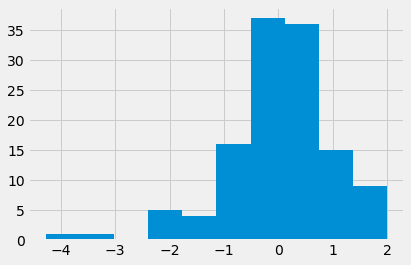

In [252]:
validate(np.log(y_train),model.predict(x_train))

MAE: 0.8268710685339837
MAE / Mean: 0.24900433172458783
RMSE: 0.9736455446280593
R2: 0.4389799047429377
MAPE: 0.3204786584565276


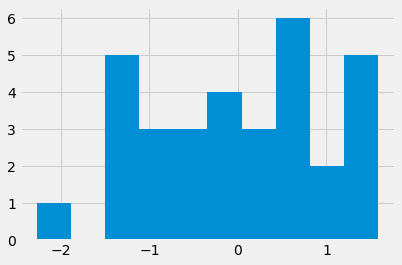

In [253]:
validate(np.log(y_test),model.predict(process_test_data(x_test)))

In [254]:
#The units are different it will not be possible to interpret 

# MAke the units the same 

# Z- Transformation 


z_train = (x_train - x_train.mean()) / x_train.std()

In [255]:
from statsmodels.api import OLS

model = OLS(np.log(y_train).astype(float),add_constant(z_train).astype(float))

model = model.fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Sales_in_thousands   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     12.75
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           5.38e-13
Time:                        11:02:13   Log-Likelihood:                -171.13
No. Observations:                 124   AIC:                             360.3
Df Residuals:                     115   BIC:                             385.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.2840      0.090     36.610      0.000       3.106       3.462
Fuel_efficiency            -0.0367      0.163     -0.226      0.822      -0.359       0.285
Manufacturer_Chevrolet      0.0593      0.094      0.630      0.530      -0.127       0.246
Manufacturer_Dodge          0.0946      0.096      0.987      0.326      -0.095       0.284
Manufacturer_Ford           0.3108      0.093      3.339      0.001       0.126       0.495
Manufacturer_Mitsubishi    -0.2528      0.093     -2.713      0.008      -0.437      -0.068
Manufacturer_Pontiac        0.1259      0.092      1.375      0.172      -0.055       0.307
Price_in_thousands         -0.7128      0.127     -5.598      0.000      -0.965      -0.461
Vehicle_type_Car            0.2511      0.135      1.864      0.065      -0.016       0.518
==============================================================================
Omnibus:                       32.452   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.720
Skew:                          -1.039   Prob(JB):                     9.82e-17
Kurtosis:                       6.155   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [256]:
model.params

const                      3.283959
Fuel_efficiency           -0.036743
Manufacturer_Chevrolet     0.059345
Manufacturer_Dodge         0.094568
Manufacturer_Ford          0.310801
Manufacturer_Mitsubishi   -0.252844
Manufacturer_Pontiac       0.125877
Price_in_thousands        -0.712819
Vehicle_type_Car           0.251061
dtype: float64